# **Music Recommendation System**

# **Milestone 1**

## **Problem Definition**

**The context** - Why is this problem important to solve?<br>
**The objectives** - What is the intended goal?<br>
**The key questions** - What are the key questions that need to be answered?<br>
**The problem formulation** - What is it that we are trying to solve using data science?


## **Data Dictionary**

The core data is the Taste Profile Subset released by The Echo Nest as part of the Million Song Dataset. There are two files in this dataset. One contains the details about the song id, titles, release, artist name and the year of release. Second file contains the user id, song id and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

### **Importing Libraries and the Dataset**

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings #Used to ignore the warning given as output of the code.
warnings.filterwarnings('ignore')

import numpy as np # Basic libraries of python for numeric and dataframe computations.
import pandas as pd

import matplotlib.pyplot as plt #Basic library for data visualization.
import seaborn as sns #Slightly advanced library for data visualization

from sklearn.metrics.pairwise import cosine_similarity #To compute the cosine similarity between two vectors.
from collections import defaultdict #A dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error # A performance metrics in sklearn.

In [ ]:
#importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/song_data.csv')

### **Understanding the data by viewing a few observations**

In [ ]:
# See top 10 header records of count_df data
count_df.head(10)

Unnamed: 0                                   user_id             song_id  \
0           0  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995   
1           1  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBBMDR12A8C13253B   
2           2  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBXHDL12A81C204C0   
3           3  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBYHAJ12A6701BF1D   
4           4  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODACBL12A8C13C273   
5           5  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODDNQT12A6D4F5F7E   
6           6  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODXRTY12AB0180F3B   
7           7  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOFGUAY12AB017B0A8   
8           8  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOFRQTD12A81C233C0   
9           9  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOHQWYZ12A6D4FA701   

   play_count  
0           1  
1           2  
2           1  
3           1  
4           1  
5           5  
6           1  
7           1  
8           1  
9           1

In [ ]:
# See top 10 header records of song_df data
song_df.head(10)

song_id                                              title  \
0  SOQMMHC12AB0180CB8                                       Silent Night   
1  SOVFVAK12A8C1350D9                                        Tanssi vaan   
2  SOGTUKN12AB017F4F1                                  No One Could Ever   
3  SOBNYVR12A8C13558C                                      Si Vos Querés   
4  SOHSBXH12A8C13B0DF                                   Tangle Of Aspens   
5  SOZVAPQ12A8C13B63C  Symphony No. 1 G minor "Sinfonie Serieuse"/All...   
6  SOQVRHI12A6D4FB2D7                                   We Have Got Love   
7  SOEYRFT12AB018936C                                  2 Da Beat Ch'yall   
8  SOPMIYT12A6D4F851E                                            Goodbye   
9  SOJCFMH12A8C13B0C2                         Mama_ mama can't you see ?   

                                release  \
0                 Monster Ballads X-Mas   
1                           Karkuteillä   
2                                Butter   
3                               De Culo   
4  Rene Ablaze Presents Winter Sessions   
5      Berwald: Symphonies Nos. 1/2/3/4   
6             Strictly The Best Vol. 34   
7                               Da Bomb   
8                             Danny Boy   
9  March to cadence with the US marines   

                                      artist_name  year  
0                                Faster Pussy cat  2003  
1                                Karkkiautomaatti  1995  
2                                  Hudson Mohawke  2006  
3                                     Yerba Brava  2003  
4                                      Der Mystic     0  
5                                David Montgomery     0  
6                              Sasha / Turbulence     0  
7                                      Kris Kross  1993  
8                                    Joseph Locke     0  
9  The Sun Harbor's Chorus-Documentary Recordings     0

### **Let us check the data types and and missing values of each column**

In [ ]:
# See the info of the count_df data
count_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
# See the info of the song_df data
song_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:**
For count_df:
  * We can see that there are 4 columns, 2 with object type data and 2 integer

For song_df:
  * We can see that there are 5 columns, 4 with object type data and only year is integer


In [ ]:
from pandas.core.reshape.merge import merge
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously.
main_df = pd.merge(count_df,pd.DataFrame(song_df.drop_duplicates(['song_id'])), on='song_id', how='left')

# Drop the column 'Unnamed: 0'
main_df = main_df.drop(['Unnamed: 0'], axis=1)

main_df.head()

user_id             song_id  play_count  \
0  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995           1   
1  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBBMDR12A8C13253B           2   
2  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBXHDL12A81C204C0           1   
3  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBYHAJ12A6701BF1D           1   
4  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODACBL12A8C13C273           1   

             title                        release    artist_name  year  
0         The Cove             Thicker Than Water   Jack Johnson     0  
1  Entre Dos Aguas            Flamenco Para Niños  Paco De Lucia  1976  
2         Stronger                     Graduation     Kanye West  2007  
3   Constellations              In Between Dreams   Jack Johnson  2005  
4     Learn To Fly  There Is Nothing Left To Lose   Foo Fighters  1999

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()
data_table.DataTable(main_df, include_index=False, num_rows_per_page=10)


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Apply label encoding for "user_id" and "song_id"
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 
main_df['user_id']= label.fit_transform(main_df['user_id']) 
main_df['song_id']= label.fit_transform(main_df['song_id']) 


In [ ]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 1999999
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   song_id      int64 
 2   play_count   int64 
 3   title        object
 4   release      object
 5   artist_name  object
 6   year         int64 
dtypes: int64(4), object(3)
memory usage: 122.1+ MB


In [ ]:
main_df

user_id  song_id  play_count                           title  \
0          54961      153           1                        The Cove   
1          54961      413           2                 Entre Dos Aguas   
2          54961      736           1                        Stronger   
3          54961      750           1                  Constellations   
4          54961     1188           1                    Learn To Fly   
...          ...      ...         ...                             ...   
1999995    64590     3660           2       Ignorance (Album Version)   
1999996    64590     3736           4          Two Is Better Than One   
1999997    64590     3744           3  What I've Done (Album Version)   
1999998    64590     3893           1                              Up   
1999999    64590     3963           1      Soil_ Soil (Album Version)   

                               release  \
0                   Thicker Than Water   
1                  Flamenco Para Niños   
2                           Graduation   
3                    In Between Dreams   
4        There Is Nothing Left To Lose   
...                                ...   
1999995                      Ignorance   
1999996                     Love Drunk   
1999997                 What I've Done   
1999998                      My Worlds   
1999999                        The Con   

                                    artist_name  year  
0                                  Jack Johnson     0  
1                                 Paco De Lucia  1976  
2                                    Kanye West  2007  
3                                  Jack Johnson  2005  
4                                  Foo Fighters  1999  
...                                         ...   ...  
1999995                                Paramore     0  
1999996  Boys Like Girls featuring Taylor Swift  2009  
1999997                             Linkin Park  2007  
1999998                           Justin Bieber  2010  
1999999                          Tegan And Sara  2007  

[2000000 rows x 7 columns]

**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

In [ ]:
# Get the column containing the users
users = main_df.user_id
# Create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1   

In [ ]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
main_df = main_df.loc[~main_df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = main_df.song_id
# Create a dictionary from songs to their number of users
ratings_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1    

In [ ]:
# We want our song to be listened by at least 120 users to be considered
RATINGS_CUTOFF = 120
remove_songs = []
for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)
df_final= main_df.loc[~main_df.song_id.isin(remove_songs)]

In [ ]:
# Drop records with play_count more than(>) 5
#df_final= main_df[main_df.play_count<= 5]
df_final.drop(df_final[(df_final['play_count']>5)].index, inplace=True)

In [ ]:
# Check the shape of the data
df_final.shape

(117876, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
from enum import unique
# Display total number of unique user_id
print('Number of unique users are =', df_final['user_id'].nunique())

Number of unique users are = 3155


Total number of unique song id

In [ ]:
# Display total number of unique song_id
print('Number of unique songs are =', df_final['song_id'].nunique())

Number of unique songs are = 563


Total number of unique artists

In [ ]:
# Display total number of unique artists
print('Number of unique artists are =', df_final['artist_name'].nunique())

Number of unique artists are = 232


#### **Observations and Insights:**

From the previous data it can be inferred:

1) User_id: are masked to protect customer's integrity and the unique identifier is very long. Since the data is too long we can only see a few of the unique customers, it can also be seen that the unique amount of customers in the data set are 3135

2) Song_id: it is useful only for internal purposes as this is the internal identification of the song in Spotify when reviewing them by id. Data shows that 563 are the unique song_ids from the data set

3) Artist_names: unique amount of artist names can be identified in this data display are 232



### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
most_interacted_songs = df_final.groupby('title').size().sort_values(ascending=False)[:10]
most_interacted_songs

title
Use Somebody                      751
Dog Days Are Over (Radio Edit)    748
Sehr kosmisch                     713
Clocks                            662
The Scientist                     652
Secrets                           618
Fireflies                         609
Creep (Explicit)                  606
Yellow                            583
Hey_ Soul Sister                  570
dtype: int64

Most interacted users

In [ ]:
most_interacted_users = df_final.groupby('user_id').size().sort_values(ascending=False)[:10]
most_interacted_users

user_id
61472    243
15733    227
37049    202
9570     184
23337    177
10763    176
9097     175
26616    175
43041    174
65994    171
dtype: int64

#### **Observations and Insights:**
According to the dataset the most interacted song is "Use Somebody" and the most interacted user is user_id 61472


Songs played in a year

In [ ]:
count_songs = df_final.groupby('year').count()['title']
count = pd.DataFrame(count_songs)
count.drop(count.index[0], inplace=True)
count.tail()

title
year       
2006   7592
2007  13750
2008  14031
2009  16351
2010   4087

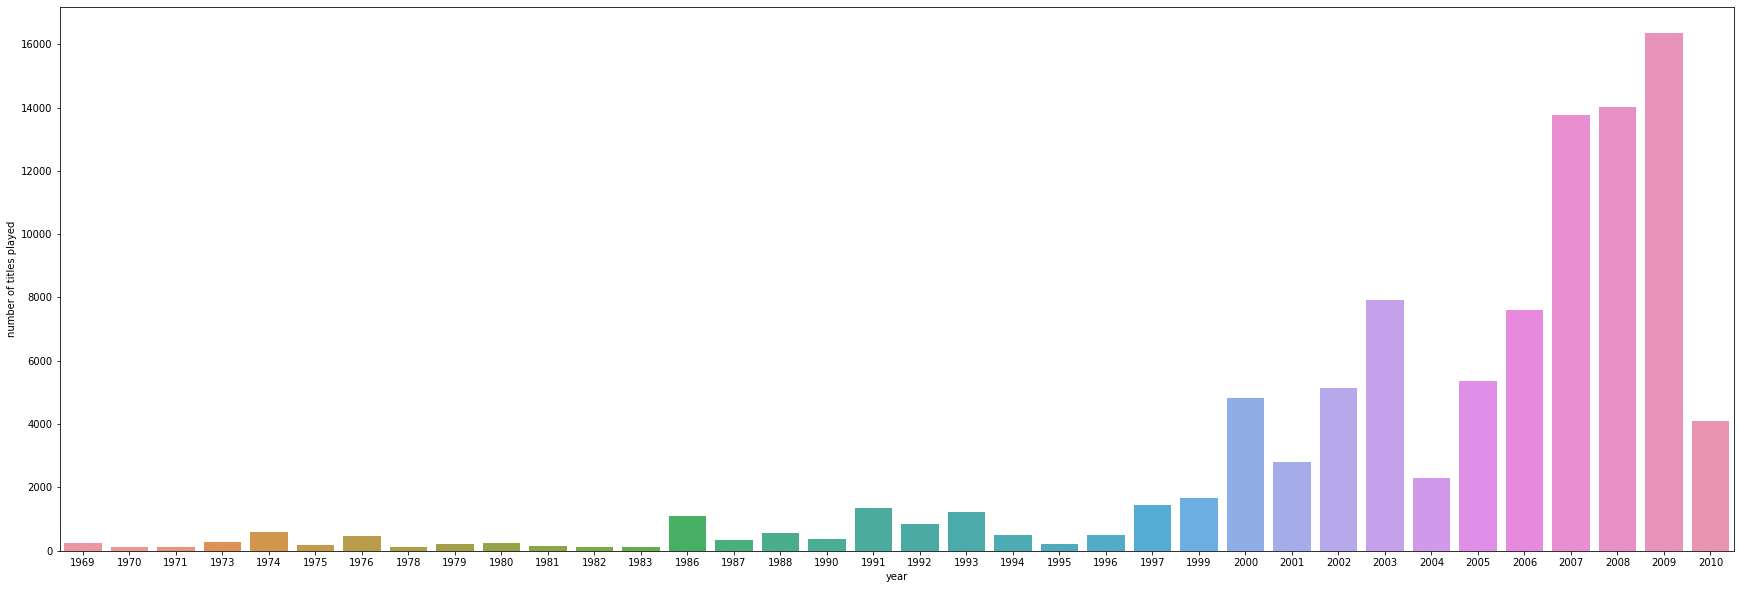

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)
plt.ylabel('number of titles played') 
# Show the plot
plt.show()

#### **Observations and Insights:** # 
The number of titles played are increasing based on the released year, however for 2010 and 2004 we can see that not that many songs that were released were played significantly if compared to the years around it. 

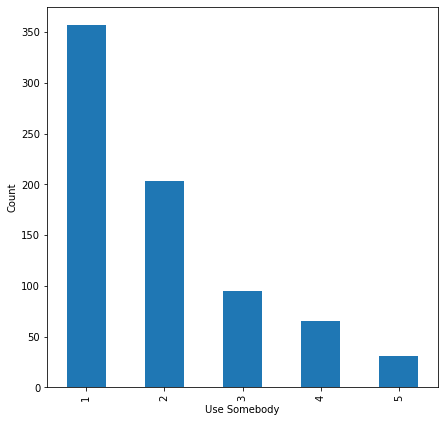

In [ ]:
#Plotting distributions of times played the most played song in the dataset named "Use Somebody" 

plt.figure(figsize=(7,7)) 
df_final[df_final['title'] == 'Use Somebody']['play_count'].value_counts().plot(kind='bar')
plt.xlabel('Use Somebody')
plt.ylabel('Count')
plt.show()

**Think About It:** What other insights can be drawn using exploratory data analysis?

## **Proposed approach**
**Potential techniques** - What different techniques should be explored?<br>
**Overall solution design** - What is the potential solution design?<br>
**Measures of success**- What are the key measures of success to compare different potential techniques?<br>

In [ ]:
#Export#
#df_final.to_csv('df_final_Milestone1V2.csv', index=False)
#!cat df_final_Milestone1V2.csv

# **Milestone 2**

Now that we have explored the data, let's apply different algorithms to build recommendation systems

**Note:** Use the shorter version of the data i.e. the data after the cutoffs as used in Milestone 1.

### **Popularity-Based Recommendation Systems**

In [ ]:
import warnings #Used to ignore the warning given as output of the code.
warnings.filterwarnings('ignore')

import numpy as np # Basic libraries of python for numeric and dataframe computations.
import pandas as pd

import matplotlib.pyplot as plt #Basic library for data visualization.
import seaborn as sns #Slightly advanced library for data visualization

from sklearn.metrics.pairwise import cosine_similarity #To compute the cosine similarity between two vectors.
from collections import defaultdict #A dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error # A performance metrics in sklearn.



Let's take the count and sum of play counts of the songs and build the popularity recommendation systems on the basis of the sum of play counts.

In [ ]:
#Check accuracy of file since it was exported from Milestone 1
df_final.shape

(117876, 7)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117876 entries, 200 to 1999765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      117876 non-null  int64 
 1   song_id      117876 non-null  int64 
 2   play_count   117876 non-null  int64 
 3   title        117876 non-null  object
 4   release      117876 non-null  object
 5   artist_name  117876 non-null  object
 6   year         117876 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 7.2+ MB


In [ ]:
#Calculating average play_count
average_count = df_final.groupby('song_id').mean()['play_count'] #Hint: Use groupby function on the song_id column. 

#Calculating the frequency a song is played.
play_freq = df_final.groupby('song_id').count()['play_count']#Hint: Use groupby function on the song_id column

In [ ]:
#Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'average_count':average_count, 'play_freq':play_freq})
final_play.head()

average_count  play_freq
song_id                          
21            1.622642        265
22            1.492424        132
52            1.729216        421
62            1.728070        114
93            1.452174        115

Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
#Build the function for finding top n songs
def top_n_songs(df_final, n, min_interaction=100):
    
    #Finding songs with minimum number of interactions
    recommendations = df_final[df_final['play_freq'] > min_interaction]
    
    #Sorting values w.r.t average_count
    recommendations = recommendations.sort_values(by='average_count', ascending=False)
    return recommendations.index[:n]

In [ ]:
  #Recommend top 10 songs using the function defined above
  list(top_n_songs(final_play, 10, 100))

[7224, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614, 352]

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity based and subsequent models we will use the "surprise" library.

In [ ]:
#Install the surprise package using pip. Uncomment and run the below code to do the same. 
!pip install surprise 

     |████████████████████████████████| 11.8 MB 33.1 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630173 sha256=0d7cd190ce1a3ac22ce61ce887cfcd6cbfb486c8660a2d11b7465905f412a772
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries
# To compute the accuracy of models
from surprise import accuracy

# class is used to parse a file containing play_counts, data should be in structure - user; item ; play_count
from surprise.reader import Reader

# class for loading datasets
from surprise.dataset import Dataset

# for tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# for splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# for implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# for implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing KFold cross-validation
from surprise.model_selection import KFold

#For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

The below is the function to calculate precision@k and recall@k, RMSE and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [ ]:
#The function to calulate the RMSE, precision@k, recall@k and F_1 score. 
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    
    #Making predictions on the test data
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)
    
    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by chaning the threshold? What is the intuition behind using the threshold value 1.5? 

In [ ]:
# Instantiating Reader scale with expected rating scale 
reader = Reader(rating_scale=(0,5)) #use rating scale (0,5)

# loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id','play_count']], reader) #Take only "user_id","song_id", and "play_count"

# splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state=42) # Take test_size=0.4





**Think About It:** How changing the test size would change the results and outputs?

In [ ]:
#Build the default user-user-similarity model
sim_options = {'name': 'msd',
               'user_based':'True'}

#KNN algorithm is used to find desired similar items.
sim_user_user = KNNBasic(sim_options=sim_options, verbose=False, random_state=1) #use random_state=1 

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k =30.
precision_recall_at_k(sim_user_user, k=30, threshold=1.5) #Use sim_user_user model

RMSE: 1.0626
Precision:  0.413
Recall:  0.608
F_1 score:  0.492


**Observations and Insights:**



In [ ]:
#predicting play_count for a sample user with a listened song.
sim_user_user.predict(6958, 1671, r_ui=2, verbose=True) #use user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.52   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.5210405508798759, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
#predicting play_count for a sample user with a song not-listened by the user.
sim_user_user.predict(6958,3232, verbose=True) #Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.43   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4314454545942712, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**


Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
## Check how to improve model performance by using hyperparameters, determine if cosine is still the best measure to keep using or needs to be changed

In [ ]:
# setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine","pearson","pearson_baseline"],
                              'user_based': [True], "min_support":[2,4]}
              }

# performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# fitting the data
gs.fit(data) #Use entire data for GridSearch

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0450508806239005
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


In [ ]:
# Train the best model found in above gridsearch.
# Step1 : using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': True,'min_support': 2}

# Step2 :creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options=sim_options, k=30, min_k=9, random_state=1, verbose=False)

# Step3 :training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k.
precision_recall_at_k(sim_user_user_optimized)


RMSE: 1.0521
Precision:  0.413
Recall:  0.721
F_1 score:  0.525


In [ ]:
# Let us compute precision@k and recall@k also with k =30.  -- min_support': 4
#precision_recall_at_k(sim_user_user_optimized, k=30)
#RMSE: 1.0579
#Precision:  0.402
#Recall:  0.786
#F_1 score:  0.532


**Observations and Insights:**

When running the analysis using k =30 and min_support': 4. The results are slightly better at this stage, than if using the recommended min_support of 2. These results are seen below:
RMSE: 1.0579
Precision:  0.402
Recall:  0.786
F_1 score:  0.532 -> ~1% better 

Since the outcome is still very low, the analysis left was min_support:2 



In [ ]:
#Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui=2
sim_user_user_optimized.predict(6958,1671, r_ui=2, verbose=True) 

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.962926073914969, details={'actual_k': 24, 'was_impossible': False})

In [ ]:
#Use user_id 6958 and song_id 3232
sim_user_user_optimized.predict(6958,3232, verbose=True) 

user: 6958       item: 3232       r_ui = None   est = 1.45   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4516261428486725, details={'actual_k': 10, 'was_impossible': False})

**Observations and Insights:**



**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain user?

In [ ]:
#Use inner id 0. 
sim_user_user_optimized.get_neighbors(0,5)

[42, 1131, 17, 186, 249]

Below we will be implementing a function where the input parameters are - 

- data: a **song** dataset
- user_id: a user id **against which we want the recommendations**
- top_n: the **number of songs we want to recommend**
- algo: the algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):
    
    # creating an empty list to store the recommended product ids
    recommendations = []
    
    # creating an user item interactions matrix 
    user_item_interactions_matrix = data.pivot(index='user_id', columns='song_id', values='play_count')
    
    # extracting those ids which the user_id has not visited yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # looping through each of the ids which user_id has not interacted yet
    for song_id in non_interacted_songs:
        
        # predicting the ratings for those non played songs ids by this user
        est = algo.predict(user_id, song_id).est
        
        # appending the predicted ratings
        recommendations.append((song_id, est))

    # sorting the predicted ratings in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:top_n] # returing top n highest predicted rating products for this user

In [ ]:
#Make top 5 recommendations for user_id 6958 with a similarity-based recommendation engine.
recommendations =get_recommendations(df_final, 6958, 5, sim_user_user_optimized)

In [ ]:
#Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns=['song_id', 'predicted_ratings'])

song_id  predicted_ratings
0     5531           2.553335
1      317           2.518269
2     4954           2.406776
3     8635           2.396606
4     5943           2.390723

**Observations and Insights:**



### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, final_rating):
  # sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending=False)[['play_freq']].reset_index()

  # merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns=['song_id','predicted_ratings']), on='song_id', how='inner')

  # rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending=False)
  
  return ranked_songs

**Think About It:** In the above function to make the correction in the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [ ]:
#Applying the ranking_songs function on the final_play data. 
ranking_songs(recommendations, final_play)


song_id  play_freq  predicted_ratings  corrected_ratings
0     5531        618           2.553335           2.513109
2      317        411           2.518269           2.468943
1     5943        423           2.390723           2.342101
3     4954        183           2.406776           2.332854
4     8635        155           2.396606           2.316284

**Observations and Insights:**


### Item Item Similarity-based collaborative filtering recommendation systems 

In [ ]:
from pandas.core.common import random_state
#Apply the item-item similarity collaborative filtering model with random_state=1 and evaluate the model performance.
sim_options = {'name': 'pearson_baseline',
               'user_based': False}

# creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item= KNNBasic(sim_options=sim_options, random_state=1, verbose=False)

# training the algorithm on the trainset
sim_item_item.fit(trainset)

# Let us compute precision@k and recall@k, f1_score@k and RMSE
precision_recall_at_k(sim_item_item)

RMSE: 1.0514
Precision:  0.403
Recall:  0.547
F_1 score:  0.464


**Observations and Insights:**

In [ ]:
#predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user.
sim_item_item.predict(6958,1671, r_ui=2, verbose=True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9634957386781853, details={'actual_k': 10, 'was_impossible': False})

In [ ]:
#Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(15271,1671, r_ui=0, verbose=True)

user: 15271      item: 1671       r_ui = 0.00   est = 3.29   {'actual_k': 6, 'was_impossible': False}


Prediction(uid=15271, iid=1671, r_ui=0, est=3.290197904064098, details={'actual_k': 6, 'was_impossible': False})

In [ ]:
#Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(1136,1671, r_ui=0, verbose=True)

**Observations and Insights:**


In [ ]:
#Apply grid search for enhancing model performance

# setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine",'pearson',"pearson_baseline"],
                              'user_based': [False], "min_support":[2,4]}
              }

# performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# fitting the data
gs.fit(data)

# find best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.022775547783626
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameter [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [ ]:
#Apply the best model found in the grid search.
# Step1 : using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': False,'min_support': 2}

# Step2 :creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options=sim_options, k=30, min_k=6, random_state=1, verbose=False)

# Step3 :training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10.
precision_recall_at_k(sim_item_item_optimized)


RMSE: 1.0328
Precision:  0.408
Recall:  0.665
F_1 score:  0.506


**Observations and Insights:**


In [ ]:
#Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9634957386781853, details={'actual_k': 10, 'was_impossible': False})

In [ ]:
#predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user.
sim_item_item_optimized.predict(6958, 3232, r_ui=0, verbose=True)

user: 6958       item: 3232       r_ui = 0.00   est = 1.28   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=0, est=1.2759946618244609, details={'actual_k': 10, 'was_impossible': False})

**Observations and Insights:**
When recommending the song 3232 to user 6958 we can see that the likelihood of having the user listening to it is low, the prediction indicates that can listen to this song ~1 time.


In [ ]:
#Find five most similar users to the user with inner id 0
sim_item_item_optimized.get_neighbors(0, k=5)

[124, 523, 173, 205, 65]

In [ ]:
#Making top 5 recommendations for user_id 6958 with item_item_similarity-based recommendation engine.
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)

In [ ]:
#Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])

song_id  predicted_play_count
0     2342              2.653903
1     5101              2.386577
2      139              2.313727
3     7519              2.270864
4     8099              2.212702

In [ ]:
#Applying the ranking_songs function. 
ranking_songs(recommendations, final_play)

song_id  play_freq  predicted_ratings  corrected_ratings
4     2342        111           2.653903           2.558987
2     5101        130           2.386577           2.298871
3      139        119           2.313727           2.222057
1     7519        168           2.270864           2.193712
0     8099        275           2.212702           2.152399

**Observations and Insights:**


### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
# Build baseline model using svd
svd = SVD(random_state=1)

# training the algorithm on the trainset
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score@k, and RMSE
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui=2
svd.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [ ]:
# Making prediction for user who has not listened the song (song_id 3232)
svd.predict(6958, 3232, r_ui=0, verbose=True)

user: 6958       item: 3232       r_ui = 0.00   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=0, est=1.5561675084403663, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# performe 3-fold gridsearch cross validation
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# fitting data
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0131180302601401
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [ ]:
# Building the optimized SVD model using optimal hyperparameters CHECK!
svd_optimized = SVD(n_epochs=30, lr_all=0.01, reg_all=0.2, random_state=1)

# Train the algorithm on the trainset
svd_optimized=svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score@k, and RMSE
precision_recall_at_k(svd_optimized)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


**Observations and Insights:**


In [ ]:
#Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671. 
svd_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3432395286125096, details={'was_impossible': False})

In [ ]:
#Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating.
svd_optimized.predict(6958, 3232, r_ui=None, verbose=True)


user: 6958       item: 3232       r_ui = None   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.442548446117648, details={'was_impossible': False})

**Observations and Insights:**


In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm.
svd_recommendations = get_recommendations(df_final,6958, 5, svd_optimized)

In [ ]:
#Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play)

song_id  play_freq  predicted_ratings  corrected_ratings
2     7224        107           2.601899           2.505225
1     5653        108           2.108728           2.012502
4     8324         96           2.014091           1.912029
0     9942        150           1.940115           1.858465
3     6450        102           1.952493           1.853478

**Observations and Insights:**


### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model
# using CoClustering algorithm.
clust_baseline = CoClustering(random_state=1)

# training the algorithm on the trainset
clust_baseline.fit(trainset)

# Let us compute precision@k and recall@k with k =10.
precision_recall_at_k(clust_baseline)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [ ]:
#Making prediction for user_id 6958 and song_id 1671.
clust_baseline.predict(6958, 1671, verbose=True)

user: 6958       item: 1671       r_ui = None   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=None, est=1.2941824757363074, details={'was_impossible': False})

In [ ]:
#Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user.
clust_baseline.predict(6958, 3232, r_ui=0, verbose=True)

user: 6958       item: 3232       r_ui = 0.00   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=0, est=1.4785259100797417, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# set the parameter space to tune
param_grid = {'n_cltr_u':[5,6,7,8], 'n_cltr_i': [5,6,7,8], 'n_epochs': [10,20,30]}

# performing 3-fold gridsearch cross validation
gs = GridSearchCV(CoClustering, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# fitting data
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0631127453394251
{'n_cltr_u': 5, 'n_cltr_i': 6, 'n_epochs': 10}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [ ]:
# Train the tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u=5,n_cltr_i=5, n_epochs=10, random_state=1)

# training the algorithm on the trainset
clust_tuned.fit(trainset)

# Let us compute precision@k and recall@k with k =10.
precision_recall_at_k(clust_tuned)

RMSE: 1.0654
Precision:  0.394
Recall:  0.566
F_1 score:  0.465


**Observations and Insights:**


In [ ]:
#Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671.
clust_tuned.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.91   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9108882530486497, details={'was_impossible': False})

In [ ]:
#Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating.
clust_tuned.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.24   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2366916027865822, details={'was_impossible': False})

**Observations and Insights:**


#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
#Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm.
clustering_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)

### Correcting the play_count and Ranking the above songs

In [ ]:
#Ranking songs based on above recommendations
ranking_songs(clustering_recommendations, final_play)

song_id  play_freq  predicted_ratings  corrected_ratings
4     7224        107           3.711503           3.614829
3     5653        108           2.903883           2.807658
0     6860        169           2.691043           2.614120
1      657        151           2.606354           2.524975
2     8483        123           2.582807           2.492640

**Observations and Insights:_________**

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [ ]:
df_small=df_final

In [ ]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117876 entries, 200 to 1999765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      117876 non-null  int64 
 1   song_id      117876 non-null  int64 
 2   play_count   117876 non-null  int64 
 3   title        117876 non-null  object
 4   release      117876 non-null  object
 5   artist_name  117876 non-null  object
 6   year         117876 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 7.2+ MB


In [ ]:
# Concatenate the "title","release","artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title'] +''+df_small['release'] +df_small['artist_name']
df_small

user_id  song_id  play_count                            title  \
200         6958      447           1               Daisy And Prudence   
202         6958      512           1  The Ballad of Michael Valentine   
203         6958      549           1        I Stand Corrected (Album)   
204         6958      703           1            They Might Follow You   
205         6958      719           1                       Monkey Man   
...          ...      ...         ...                              ...   
1999734    47786     9139           1                 Half Of My Heart   
1999736    47786     9186           1            Bitter Sweet Symphony   
1999745    47786     9351           2       The Police And The Private   
1999755    47786     9543           1                     Just Friends   
1999765    47786     9847           1             He Can Only Hold Her   

                       release      artist_name  year  \
200               Distillation     Erin McKeown  2000   
202                    Sawdust      The Killers  2004   
203            Vampire Weekend  Vampire Weekend  2007   
204                Tiny Vipers      Tiny Vipers  2007   
205       You Know I'm No Good    Amy Winehouse  2007   
...                        ...              ...   ...   
1999734         Battle Studies       John Mayer     0   
1999736  Bitter Sweet Symphony        The Verve  1997   
1999745            Live It Out           Metric  2005   
1999755          Back To Black    Amy Winehouse  2006   
1999765          Back To Black    Amy Winehouse  2006   

                                                      text  
200             Daisy And PrudenceDistillationErin McKeown  
202      The Ballad of Michael ValentineSawdustThe Killers  
203      I Stand Corrected (Album)Vampire WeekendVampir...  
204            They Might Follow YouTiny VipersTiny Vipers  
205            Monkey ManYou Know I'm No GoodAmy Winehouse  
...                                                    ...  
1999734           Half Of My HeartBattle StudiesJohn Mayer  
1999736  Bitter Sweet SymphonyBitter Sweet SymphonyThe ...  
1999745        The Police And The PrivateLive It OutMetric  
1999755             Just FriendsBack To BlackAmy Winehouse  
1999765     He Can Only Hold HerBack To BlackAmy Winehouse  

[117876 rows x 8 columns]

In [ ]:
#Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

#drop the duplicates from the title column
df_small= df_small.drop_duplicates(subset=['title'])

#Set the title column as the index
df_small = df_small.set_index('title')

# see the first 5 records of the df_small dataset
df_small.head()

user_id  song_id  play_count  \
title                                                           
Daisy And Prudence                  6958      447           1   
The Ballad of Michael Valentine     6958      512           1   
I Stand Corrected (Album)           6958      549           1   
They Might Follow You               6958      703           1   
Monkey Man                          6958      719           1   

                                                                              text  
title                                                                               
Daisy And Prudence                      Daisy And PrudenceDistillationErin McKeown  
The Ballad of Michael Valentine  The Ballad of Michael ValentineSawdustThe Killers  
I Stand Corrected (Album)        I Stand Corrected (Album)Vampire WeekendVampir...  
They Might Follow You                  They Might Follow YouTiny VipersTiny Vipers  
Monkey Man                             Monkey ManYou Know I'm No GoodAmy Winehouse

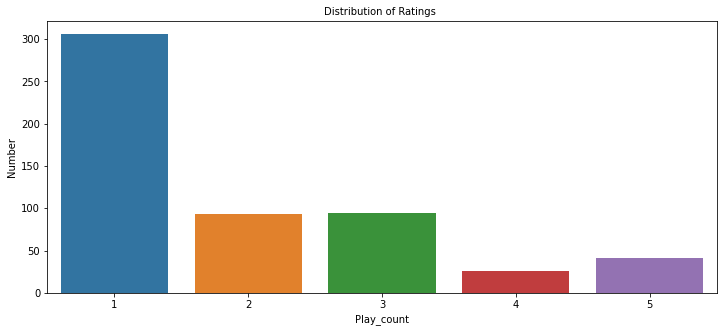

In [ ]:
#Analyze top CHECK!
plt.figure(figsize = (12, 5))
ax = sns.countplot(x="play_count", data=df_small)

plt.tick_params(labelsize = 10)
plt.title("Distribution of Ratings ", fontsize = 10)
plt.xlabel("Play_count", fontsize = 10)
plt.ylabel("Number", fontsize = 10)
plt.show()

In [ ]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)
indices[:5]

0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
Name: title, dtype: object

In [ ]:
#Importing necessary packages to work with text data
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
import re
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


We will create a **function to pre-process the text data:**

In [ ]:
# Function to tokenize the text
def tokenize(text):
    text = re.sub(r"[^a-zA-Z]"," ",text.lower())
    tokens = word_tokenize(text)
    words = [word for word in tokens if word not in stopwords.words("english")] #Use stopwords of english
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
#Create tfidf vectorizer 
tfidf = TfidfVectorizer(tokenizer=tokenize)
# Fit_transfrom the above vectorizer on the text column and then convert the output into an array.
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

In [ ]:
pd.DataFrame(song_tfidf)

0     1     2     3     4     5     6     7     8     9     ...  1639  \
0     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
556   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
557   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
558   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
559   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
560   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

     1640  1641  1642      1643  1644  1645  1646  1647  1648  
0     0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0  
1     0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0  
2     0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0  
3     0.0   0.0   0.0  0.452606   0.0   0.0   0.0   0.0   0.0  
4     0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0  
..    ...   ...   ...       ...   ...   ...   ...   ...   ...  
556   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0  
557   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0  
558   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0  
559   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0  
560   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0  

[561 rows x 1649 columns]

In [ ]:
#From the data, there are 1649 features. The next step will be to calculate cosine similarity to find similarities in the dataset.

# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)
similar_songs

 Finally, let's create a function to find most similar songs to recommend for a given song

In [ ]:
# function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    
    recommended_songs = []
    
    # gettin the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1:11].index)
    print(top_10_indexes)
    
    # populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])
        
    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)


[345, 423, 234, 509, 374, 370, 371, 372, 373, 376]


['From Left To Right',
 'Nothing Better (Album)',
 'The Pretender',
 'Everlong',
 'Who Let You Go?',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 "Sam's Town"]

**Observations and Insights:_________**

In [ ]:
recommendations("Daisy And Prudence", similar_songs)

[309, 487, 10, 472, 7, 552, 32, 489, 356, 377]


['Blackbirds',
 'Love In 2 Parts',
 "You Mustn't Kick It Around",
 'La Petite Mort',
 'Fast As I Can',
 'Lullaby In Three/Four',
 'Rhode Island Is Famous For You',
 'Monday Morning Cold (band)',
 'Rianna',
 'Out There On The Ice']

## **Conclusion and Recommendations:** 

- **Refined Insights -** What are the most meaningful insights from the data relevant to the problem?

- **Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

- **Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?